In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
path = '../data/'

In [3]:
# Read data on building features from the railbelt grid

building_features = pd.read_csv('../output/joined_data_nonmissing_railbelt.csv')


In [4]:
# Creating a variable that shows age in years

# get current date and time
now = datetime.now() 

# format current date to obtain year
year = int(now.strftime("%Y"))
print("year:", year)

building_features['age_yrs'] = year - building_features['age']
building_features.head()

year: 2022


,age,osm_id,areasq_ft,height,zip_code,zip_group,FD_1981_2010,TD_1981_2010,FD_2000,TD_2000,FD_2010,TD_2010,FD_80,TD_80,FD_90,TD_90,FD_recent_1991_2020,TD_recent_1991_2020,age_yrs
0,2004.0,485655552,1011.819332,-1.156223,99507,9950,-992.202746,1847.074732,-941.482003,1945.692756,-765.664519,2051.646462,-998.157617,1769.070361,-1036.968618,1826.461078,-914.705047,1941.266765,18.0
1,1994.0,821173300,943.256095,0.272816,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,28.0
2,1997.0,821210009,825.083952,0.406550,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,25.0
3,1995.0,821210030,597.375132,0.529883,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,27.0
4,1994.0,821210032,307.360121,-0.293179,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,28.0


In [5]:
# Create a list of zip codes by county

# Fairbanks
zip_fb = [99701, 99702, 99703, 99705, 99706, 99707, 99708, 99709, 99710, 
          99711, 99712, 99714, 99716, 99725, 99775, 99790]

# Anchorage
zip_an = [99501, 99502, 99503, 99504, 99505, 99506, 99507, 99508, 99509, 99510,
           99511, 99513, 99514, 99515, 99516, 99517, 99518, 99519, 99520, 99521,
           99522, 99523, 99524, 99529, 99530, 99540, 99599, 99695]

In [6]:
# Creating BTU variable using Alaska Housing Regression (here heat load is in kilo BTU/year/sqft)
        

def replace_btu(index):

    # Fairbanks: note the age variable is the year of built
    if building_features.loc[index,'zip_code'] in zip_fb:
        return building_features.loc[index,'age']*(-0.9937) + 2102.7
    
    # Anchorage: note the age variable is the year of built  
    elif building_features.loc[index,'zip_code'] in zip_an:
        return building_features.loc[index,'age']*(-1.204) + 2514.6 
        
    else:
        return None
        

building_features['annual_btu/sqft'] = building_features.index.to_series().apply(replace_btu)


In [7]:
building_features.head()
    

,age,osm_id,areasq_ft,height,zip_code,zip_group,FD_1981_2010,TD_1981_2010,FD_2000,TD_2000,FD_2010,TD_2010,FD_80,TD_80,FD_90,TD_90,FD_recent_1991_2020,TD_recent_1991_2020,age_yrs,annual_btu/sqft
0,2004.0,485655552,1011.819332,-1.156223,99507,9950,-992.202746,1847.074732,-941.482003,1945.692756,-765.664519,2051.646462,-998.157617,1769.070361,-1036.968618,1826.461078,-914.705047,1941.266765,18.0,101.784
1,1994.0,821173300,943.256095,0.272816,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,28.0,NaN
2,1997.0,821210009,825.083952,0.406550,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,25.0,NaN
3,1995.0,821210030,597.375132,0.529883,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,27.0,NaN
4,1994.0,821210032,307.360121,-0.293179,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,28.0,NaN


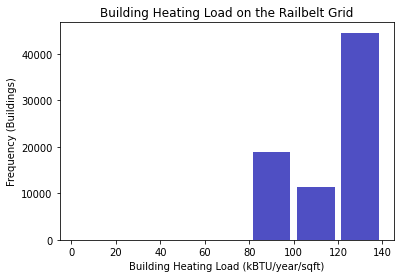

In [8]:
# Check the distribution of btu for buildings on the railbelt grid
plt.hist(x = building_features['annual_btu/sqft'], bins=list(range(0,141,20)) , color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Heating Load on the Railbelt Grid')

plt.xticks(list(range(0,141,20)))
plt.xlabel('Building Heating Load (kBTU/year/sqft)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_btu_railbelt.png', dpi =100)


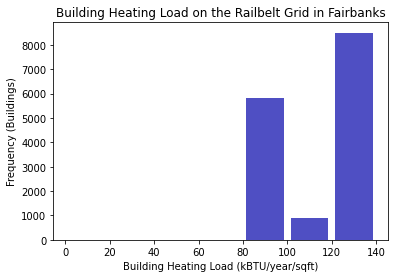

In [9]:
# Check the distribution of btu for buildings on the railbelt grid in Fairbanks
plt.hist(x = building_features['annual_btu/sqft'].loc[building_features['zip_code'].isin(zip_fb) ], bins=list(range(0,141,20)) , color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Heating Load on the Railbelt Grid in Fairbanks')

plt.xticks(list(range(0,141,20)))
plt.xlabel('Building Heating Load (kBTU/year/sqft)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_btu_railbelt_fb.png', dpi =100)


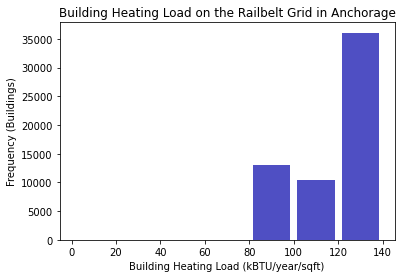

In [10]:
# Check the distribution of btu for buildings on the railbelt grid in Anchorage
plt.hist(x = building_features['annual_btu/sqft'].loc[building_features['zip_code'].isin(zip_an) ], bins=list(range(0,141,20)) , color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Heating Load on the Railbelt Grid in Anchorage')

plt.xticks(list(range(0,141,20)))
plt.xlabel('Building Heating Load (kBTU/year/sqft)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_btu_railbelt_an.png', dpi =100)

In [11]:
# Create total btu variable by multiplying area
building_features['annual_btu'] = building_features['annual_btu/sqft']*building_features['areasq_ft']

In [12]:
building_features.to_csv('../output/data_btu_railbelt.csv', index=False)